[links](https://www.gitbook.com/book/htygithub/machine-learning-python)

In [29]:
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

import matplotlib.pyplot as plt



# 分類法/範例一: Recognizing hand-written digits 
> 如何用 **SVM演算法** 來達成手寫的數字辨識

## step 1 引入函式庫及內建手寫數字資料庫

### 畫出第一個圖片

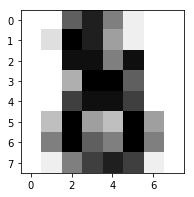

In [6]:
digits = datasets.load_digits()
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

### 載入數字資料集，將一個dict型別資料存入digits

In [8]:
print(type(digits))

for key,value in digits.items() :
    try:
        print (key,value.shape)
    except:
        print (key)


<class 'sklearn.utils.Bunch'>
('images', (1797, 8, 8))
('data', (1797, 64))
('target_names', (10,))
DESCR
('target', (1797,))


In [23]:
images_and_labels = list(zip(digits.images, digits.target))

# print(images_and_labels)
len(digits.images)

1797

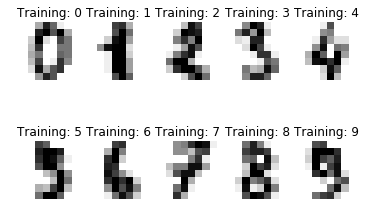

In [26]:
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

## step 2 訓練以及分類

In [ ]:
n_samples = len(digits.images)

# 資料攤平:1797 x 8 x 8 -> 1797 x 64
# 這裏的-1代表自動計算，相當於 (n_samples, 64)
data = digits.images.reshape((n_samples, -1))

# 產生SVC分類器
classifier = svm.SVC(gamma=0.001)

# 用前半部份的資料來訓練
classifier.fit(data[:n_samples / 2], digits.target[:n_samples / 2])

expected = digits.target[n_samples / 2:]

#利用後半部份的資料來測試分類器，共 899筆資料
predicted = classifier.predict(data[n_samples / 2:])
type(predicted)

In [36]:
print(expected[:60])
print(predicted[:60])

[8 8 4 9 0 8 9 8 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9
 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 2 7 8 2 0]
[8 8 4 9 0 8 9 8 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 9 6 7 8 9
 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 9 1 2 7 8 2 0]


## step 3 分類準確度統計

### 「混淆矩陣」(Confusion matrix) 判斷精準度

In [39]:
print("Confusion matrix:\n\n %s"
    % metrics.confusion_matrix(expected, predicted))

Confusion matrix:

 [[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


每 row 代表實際是什麼數字
每 column 代表預測的數字
此矩陣對角線左上方第一個數字 87，代表實際為0且預測為0的總數有87個，同一列(row)第五個元素則代表，實際為0但判斷為4的資料個數為1個
實際為1且預測為1的總數有88個
實際為1且預測為2的總數有1個
實際為3時，有3次誤判為5;有4次誤判為7;有5次誤判為8



[0 1 2 3 4 5 6 7 8 9]


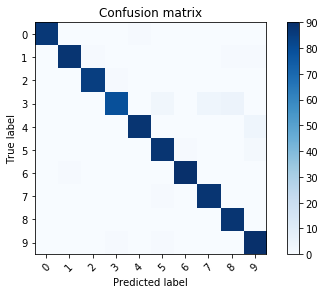

In [42]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    import numpy as np
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #('target_names', (10L,))	說明10種分類之對應 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    # target_names 為有幾種分類
    tick_marks = np.arange(len(digits.target_names))
    print(tick_marks)
    
    plt.xticks(tick_marks, digits.target_names, rotation=45)
    plt.yticks(tick_marks, digits.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure()
plot_confusion_matrix(metrics.confusion_matrix(expected, predicted))

以手寫影像3為例，我們可以用四個數字來探討判斷的精準度。

* True Positive(TP,真陽):實際為3，判斷為3，共79個 **判斷正確**
* False Positive(FP,偽陽):實際不為3，但判斷成3，共2個 (2,3), (9,3)
* False Negative(FN,偽陰):實際為3，但判斷成其他數字，共12個
* True Negative(TN,真陰):實際不為3，且判斷不為3。也就是其餘899-79-2-12=885個 **判斷正確**

||positive|negative|
| -------- | -------- | -------- |
|true|79|885|
|false|2|12|

* precision = TP/(TP+FP) = 79/81 = 0.98
* 判斷為3且實際為3的比例為0.98
* recall = TP/(TP+FN) = 79/91 = 0.87
* 實際為3且判斷為3的比例為0.87
* f1-score 則為以上兩者之「harmonic mean 調和平均數」
* f1-score= 2 x precision x recall/(recision + recall) = 0.92

In [43]:
print("Classification report for classifier %s:\n%s\n"
    % (classifier, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899




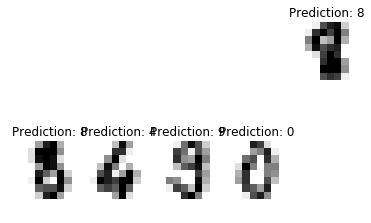

In [48]:
images_and_predictions = list(
                        zip(digits.images[n_samples / 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:5]):
    plt.subplot(2, 5, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

# 分類法/範例二: Normal and Shrinkage Linear Discriminant Analysis for classification
> 使用 **Linear Discriminant Analysis (LDA)** 線性判別分析來達成資料分類的目的

## step 1 產生測試資料